In [1]:
###########################################################################################
# Code to automate the data extraction and creation of fundamental plots for the FE ASICs #
#                       --> Includes Cryocycles [0,5,20,100]                              #
#                               Author: Steven Doran                                      #
###########################################################################################

import matplotlib.pyplot as plt
import numpy as np

TotalChips = int(34)                             # specify number of chips you are using for data
TotalCryo = int(3); Cryocycles = [0,5,20] #,100]    # specify cryocyles

T = []
# Need to adjust the numbering of the chips
# We start at 20 for this batch
for i in range(TotalChips):
    T.append(i+20)

# Create strings so it can automatically read in txt data
chips = []
for i in range(TotalChips):
    a = 'chip' + str(i+20)
    chips = np.append(chips,a)
data = []; txt = []
for i in range(len(chips)):
    data.append([]); txt.append([])
for i in range(len(chips)):
    for j in Cryocycles:
        e = 'DataRT' + str(j) + str(chips[i])
        data[i] = np.append(data[i],e)
        f = str(chips[i]) + 'RT' + str(j) + '.dat'
        txt[i] = np.append(txt[i],f)   # stores the actual data file's name we wish to extract from

# extract data to RMS,Mean,Gain,Ch,PF arrays
# Data[i][j][k] = RMS[chip#][Cryocycle#][channel#]
RMS = np.zeros((len(chips),len(Cryocycles),16))
Mean = np.zeros((len(chips),len(Cryocycles),16))
Ch = np.zeros((len(chips),len(Cryocycles),16))
PF = np.zeros((len(chips),len(Cryocycles),16))
Gain = np.zeros((len(chips),len(Cryocycles),16))

for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        r = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        rr = r.T[0]
        RMS[j][i] = rr[:]
        m = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        mm = m.T[1]
        Mean[j][i] = mm[:]
        cc = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        ccc = cc.T[2]
        Ch[j][i] = ccc[:]
        p = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        passfail = p.T[3]
        PF[j][i] = passfail[:]
        g = np.loadtxt(str(txt[j][i]),dtype=float,delimiter=None)
        gg = g.T[4]
        Gain[j][i] = gg[:]
        
# Normalize the channel Numbers
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        for k in range(len(Ch[i][j])):
            if 32. > Ch[i][j][k] > 15.:
                Ch[i][j][k] = Ch[i][j][k] - 16.
            if 48. > Ch[i][j][k] > 31.:
                Ch[i][j][k] = Ch[i][j][k] - 32.
            if Ch[i][j][k] > 47.:
                Ch[i][j][k] = Ch[i][j][k] - 48.

# Fill lists of lists based off of Pass-Fail
# passRMS, etc... will be filled with data on passed values; failRMS with failed
passRMS = []; passMean = []; passCh = []; passPF = []; passGain = []
failRMS = []; failMean = []; failCh = []; failPF = []; failGain = []

# create a list of lists - containing each chip as a seperate index
for i in range(len(chips)):
    passRMS.append(([])); passMean.append(([])); passCh.append(([])); passPF.append(([])); passGain.append(([]))
    failRMS.append(([])); failMean.append(([])); failCh.append(([])); failPF.append(([])); failGain.append(([]))
for i in range(len(chips)):
    for j in range(len(Cryocycles)):
        passRMS[i].append(([])); passMean[i].append(([])); 
        passCh[i].append(([])); passPF[i].append(([])); passGain[i].append(([]))
        failRMS[i].append(([])); failMean[i].append(([]));
        failCh[i].append(([])); failPF[i].append(([])); failGain[i].append(([]))
# append data to the associated lists, based off of P/F
for j in range(len(chips)):
    for i in range(len(Cryocycles)):
        for k in range(0,16):
            if PF[j][i][k] == 0.:
                passRMS[j][i].append((RMS[j][i][k])); passMean[j][i].append((Mean[j][i][k]));
                passCh[j][i].append((Ch[j][i][k]))
                passPF[j][i].append((PF[j][i][k])); passGain[j][i].append((Gain[j][i][k])) 
            if PF[j][i][k] == 1.:
                failRMS[j][i].append((RMS[j][i][k])); failMean[j][i].append((Mean[j][i][k]));
                failCh[j][i].append((Ch[j][i][k]))
                failPF[j][i].append((PF[j][i][k])); failGain[j][i].append((Gain[j][i][k]))

print('done')

done


### Histograms

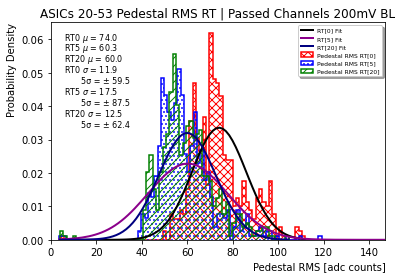

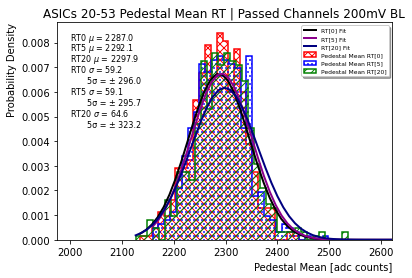

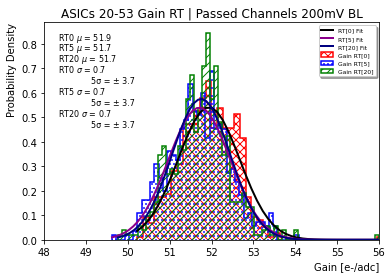

done


In [14]:
#%matplotlib

import matplotlib.pyplot as plt
import numpy as np
from statistics import NormalDist
from scipy.stats import norm

# Histograms - Append data into pass/fail
pR = []; pM = []; pG = []   # Pass RMS, Mean, Gain
fR = []; fM = []; fG = []   # Failed RMS, Mean, Gain

for i in range(len(Cryocycles)):
    pR.append([]); pM.append([]); pG.append([]); fR.append([]); fM.append([]); fG.append([])

# passMean[chip][cryo][data]
    
for i in range(len(passMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(passMean[i][j])):
            pM[j].append(passMean[i][j][k])
for i in range(len(failMean)):
    for j in range(len(Cryocycles)):
        for k in range(len(failMean[i][j])):
            fM[j].append(failMean[i][j][k])
    
for i in range(len(passRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(passRMS[i][j])):
            pR[j].append(passRMS[i][j][k])
for i in range(len(failRMS)):
    for j in range(len(Cryocycles)):
        for k in range(len(failRMS[i][j])):
            fR[j].append(failRMS[i][j][k])
            
for i in range(len(passGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(passGain[i][j])):
            pG[j].append(passGain[i][j][k])
for i in range(len(failGain)):
    for j in range(len(Cryocycles)):
        for k in range(len(failGain[i][j])):
            fG[j].append(failGain[i][j][k])
            
################### sigma and mean calculations ######################
normGain0 = NormalDist.from_samples(pG[0])
G0_mean = normGain0.mean; G0_std = normGain0.stdev
G0m = 'RT0 ' + r'$\mu$' + ' = ' + str(round(G0_mean,1))
G0s = 'RT0 ' + r'$\sigma$' + ' = ' + str(round(G0_std,1))
normGain5 = NormalDist.from_samples(pG[1])
G5_mean = normGain5.mean; G5_std = normGain5.stdev
G5m = 'RT5 ' + r'$\mu$' + ' = ' + str(round(G5_mean,1))
G5s = 'RT5 ' + r'$\sigma$' + ' = ' + str(round(G5_std,1))
normGain20 = NormalDist.from_samples(pG[2])
G20_mean = normGain20.mean; G20_std = normGain20.stdev
G20m = 'RT20 ' + r'$\mu$' + ' = ' + str(round(G20_mean,1))
G20s = 'RT20 ' + r'$\sigma$' + ' = ' + str(round(G20_std,1))

normRMS0 = NormalDist.from_samples(pR[0])
R0_mean = normRMS0.mean; R0_std = normRMS0.stdev
R0m = 'RT0 ' + r'$\mu$' + ' = ' + str(round(R0_mean,1))
R0s = 'RT0 ' + r'$\sigma$' + ' = ' + str(round(R0_std,1))
normRMS5 = NormalDist.from_samples(pR[1])
R5_mean = normRMS5.mean; R5_std = normRMS5.stdev
R5m = 'RT5 ' + r'$\mu$' + ' = ' + str(round(R5_mean,1))
R5s = 'RT5 ' + r'$\sigma$' + ' = ' + str(round(R5_std,1))
normRMS20 = NormalDist.from_samples(pR[2])
R20_mean = normRMS20.mean; R20_std = normRMS20.stdev
R20m = 'RT20 ' + r'$\mu$' + ' = ' + str(round(R20_mean,1))
R20s = 'RT20 ' + r'$\sigma$' + ' = ' + str(round(R20_std,1))

normMean0 = NormalDist.from_samples(pM[0])
M0_mean = normMean0.mean; M0_std = normMean0.stdev
M0m = 'RT0 ' + r'$\mu$' + ' = ' + str(round(M0_mean,1))
M0s = 'RT0 ' + r'$\sigma$' + ' = ' + str(round(M0_std,1))
normMean5 = NormalDist.from_samples(pM[1])
M5_mean = normMean5.mean; M5_std = normMean5.stdev
M5m = 'RT5 ' + r'$\mu$' + ' = ' + str(round(M5_mean,1))
M5s = 'RT5 ' + r'$\sigma$' + ' = ' + str(round(M5_std,1))
normMean20 = NormalDist.from_samples(pM[2])
M20_mean = normMean20.mean; M20_std = normMean20.stdev
M20m = 'RT20 ' + r'$\mu$' + ' = ' + str(round(M20_mean,1))
M20s = 'RT20 ' + r'$\sigma$' + ' = ' + str(round(M20_std,1))


R0 = pR[0]; R5 = pR[1]; M0 = pM[0]; M5 = pM[1]; G0 = pG[0]; G5 = pG[1]
R20 = pR[2]; M20 = pM[2]; G20 = pG[2]

########################################################################
# Limits
RMSlow = 0.; RMShigh = 147.
Meanlow = 1974; Meanhigh = 2621.
Gainlow = 48; Gainhigh = 56
##########################################################################
# RMS
fig, ax = plt.subplots()
ax.set_title('ASICs 20-53 Pedestal RMS RT | Passed Channels 200mV BL')
ax.set_xlabel('Pedestal RMS [adc counts]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
ee = max(R0)-min(R0); e = max(R5)-min(R5); f = max(R20)-min(R20); ratio = f/e; ratio_1 = ee/e
binsR5 = 150; binsR20 = int(binsR5*ratio); binsR0 = int(binsR5*ratio_1)

mu = R0_mean; sigma = R0_std
count, bins, ignored = ax.hist(R0, binsR0, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Pedestal RMS RT[0]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', label = 'RT[0] Fit')
# RT[5]
mu = R5_mean; sigma = R5_std
count, bins, ignored = ax.hist(R5, binsR5, histtype = 'step',
             hatch = '...', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Pedestal RMS RT[5]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='darkmagenta', label = 'RT[5] Fit')
# RT[20]
mu = R20_mean; sigma = R20_std
count, bins, ignored = ax.hist(R20, binsR20, histtype = 'step',
             hatch = '///', stacked = False, color = 'green', linewidth = 1.5,
             label = 'Pedestal RMS RT[20]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='navy', label = 'RT[20] Fit')

ax.text(.04,0.92,R0m,size = 8,transform = ax.transAxes)
ax.text(.04,0.87,R5m,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,R20m,size = 8,transform = ax.transAxes)
ax.text(.04,0.77,R0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.67,R5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.57,R20s,size = 8,transform = ax.transAxes)

# 5-sigma values
Rsig5_0 = '5σ = ± ' + str(round(5*R0_std,1))   
ax.text(.09,0.72,Rsig5_0,size = 8,transform = ax.transAxes)
Rsig5_5 = '5σ = ± ' + str(round(5*R5_std,1))   
ax.text(.09,0.62,Rsig5_5,size = 8,transform = ax.transAxes)
Rsig5_20 = '5σ = ± ' + str(round(5*R20_std,1))   
ax.text(.09,0.52,Rsig5_20,size = 8,transform = ax.transAxes)

ax.set_xlim([RMSlow,RMShigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../RMS RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

#######################################################################################
# Mean
fig, ax = plt.subplots()
ax.set_title('ASICs 20-53 Pedestal Mean RT | Passed Channels 200mV BL')
ax.set_xlabel('Pedestal Mean [adc counts]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
gg = max(M0)-min(M0); g = max(M5)-min(M5); h = max(M20)-min(M20); ratio1 = h/g; ratio_2 = gg/g
binsM5 = 75; binsM20 = int(binsM5*ratio1); binsM0 = int(binsM5*ratio_2)

mu = M0_mean; sigma = M0_std
count, bins, ignored = ax.hist(M0, binsM0, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Pedestal Mean RT[0]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', label = 'RT[0] Fit')
# RT[5]
mu = M5_mean; sigma = M5_std
count, bins, ignored = ax.hist(M5, binsM5, histtype = 'step',
             hatch = '...', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Pedestal Mean RT[5]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='darkmagenta', label = 'RT[5] Fit')
# RT[20]
mu = M20_mean; sigma = M20_std
count, bins, ignored = ax.hist(M20, binsM20, histtype = 'step',
             hatch = '///', stacked = False, color = 'green', linewidth = 1.5,
             label = 'Pedestal Mean RT[20]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='navy', label = 'RT[20] Fit')

ax.text(.04,0.92,M0m,size = 8,transform = ax.transAxes)
ax.text(.04,0.87,M5m,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,M20m,size = 8,transform = ax.transAxes)
ax.text(.04,0.77,M0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.67,M5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.57,M20s,size = 8,transform = ax.transAxes)

# 5-sigma values
Msig5_0 = '5σ = ± ' + str(round(5*M0_std,1))
ax.text(.09,0.72,Msig5_0,size = 8,transform = ax.transAxes)
Msig5_5 = '5σ = ± ' + str(round(5*M5_std,1))   
ax.text(.09,0.62,Msig5_5,size = 8,transform = ax.transAxes)
Msig5_20 = '5σ = ± ' + str(round(5*M20_std,1))   
ax.text(.09,0.52,Msig5_20,size = 8,transform = ax.transAxes)
ax.set_xlim([Meanlow,Meanhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../Mean RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

######################################################################################
# Gain
fig, ax = plt.subplots()
ax.set_title('ASICs 20-53 Gain RT | Passed Channels 200mV BL')
ax.set_xlabel('Gain [e-/adc]', loc = 'right')
ax.set_ylabel('Probability Density', loc = 'top')

# Proper Binning
ll = max(G0)-min(G0); l = max(G5)-min(G5); m = max(G20)-min(G20); ratio2 = m/l; ratio_3 = ll/l
binsG5 = 40; binsG20 = int(binsG5*ratio2); binsG0 = int(binsG5*ratio_3)

mu = G0_mean; sigma = G0_std
count, bins, ignored = ax.hist(G0, 65, histtype = 'step',
             hatch = 'xxx', stacked = False, color = 'red', linewidth = 1.5,
             label = 'Gain RT[0]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='black', label = 'RT[0] Fit')
# RT[5]
mu = G5_mean; sigma = G5_std
count, bins, ignored = ax.hist(G5, 65, histtype = 'step',
             hatch = '...', stacked = False, color = 'blue', linewidth = 1.5,
             label = 'Gain RT[5]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='darkmagenta', label = 'RT[5] Fit')
# RT[20]
mu = G20_mean; sigma = G20_std
count, bins, ignored = ax.hist(G20, 65, histtype = 'step',
             hatch = '///', stacked = False, color = 'green', linewidth = 1.5,
             label = 'Gain RT[20]', density = True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='navy', label = 'RT[20] Fit')
ax.text(.04,0.92,G0m,size = 8,transform = ax.transAxes)
ax.text(.04,0.87,G5m,size = 8,transform = ax.transAxes)
ax.text(.04,0.82,G20m,size = 8,transform = ax.transAxes)
ax.text(.04,0.77,G0s,size = 8,transform = ax.transAxes)
ax.text(.04,0.67,G5s,size = 8,transform = ax.transAxes)
ax.text(.04,0.57,G20s,size = 8,transform = ax.transAxes)

# 5-sigma values
Gsig5_0 = '5σ = ± ' + str(round(5*G0_std,1))   # 72.1
ax.text(.14,0.72,Gsig5_0,size = 8,transform = ax.transAxes)
Gsig5_5 = '5σ = ± ' + str(round(5*G5_std,1))   
ax.text(.14,0.62,Gsig5_5,size = 8,transform = ax.transAxes)
Gsig5_20 = '5σ = ± ' + str(round(5*G5_std,1))   
ax.text(.14,0.52,Gsig5_20,size = 8,transform = ax.transAxes)
ax.set_xlim([Gainlow,Gainhigh])
plt.legend(shadow=True, loc = 'upper right', prop={'size': 6})
path1 = '../../../../Gain RT.png'
plt.savefig(path1,dpi=300, bbox_inches='tight', pad_inches=.3,facecolor = 'w')
plt.show()

print('done')

#savefig()

In [7]:
###### Determining 3-sigma and 5-sigma for the distributions
# You can apply these cuts above to sorting out the problematic chips

# RT0
# RMS
print('############### RT0 ###############')
print('RMS', '\nμ =', round(R0_mean,2), '| σ =', round(R0_std,2))
print('3σ =', '±', round(3*R0_std,2), '| 5σ =', '±', round(5*R0_std,2))
print('X-lim 3σ range = [0,', R0_mean + round(3*R0_std,2), ']')
print('X-lim 5σ range = [0,', R0_mean + round(5*R0_std,2), ']')
print('Note -> RMS 3 sigma and 5 sigma values fall below 0')
print('\n')

# Mean
print('Mean', '\nμ =', round(M0_mean,2), '| σ =', round(M0_std,2))
print('3σ =', '±', round(3*M0_std,2), '| 5σ =', '±', round(5*M0_std,2))
print('X-lim 3σ range = [', M0_mean - round(3*M0_std,2), ',', M0_mean + round(3*M0_std,2), ']')
print('X-lim 5σ range = [', M0_mean - round(5*M0_std,2), ',', M0_mean + round(5*M0_std,2), ']')
print('\n')

# Gain
print('Gain', '\nμ =', round(G0_mean,2), '| σ =', round(G0_std,2))
print('3σ =', '±', round(3*G0_std,2), '| 5σ =', '±', round(5*G0_std,2))
print('X-lim 3σ range = [', G0_mean - round(3*G0_std,2), ',', G0_mean + round(3*G0_std,2), ']')
print('X-lim 5σ range = [', G0_mean - round(5*G0_std,2), ',', G0_mean + round(5*G0_std,2), ']')


# RT5
# RMS
print('\n############### RT5 ###############')
print('RMS', '\nμ =', round(R5_mean,2), '| σ =', round(R5_std,2))
print('3σ =', '±', round(3*R5_std,2), '| 5σ =', '±', round(5*R5_std,2))
print('X-lim 3σ range = [0,', R5_mean + round(3*R5_std,2), ']')
print('X-lim 5σ range = [0,', R5_mean + round(5*R5_std,2), ']')
print('Note -> RMS 3 sigma and 5 sigma values fall below 0')
print('\n')

# Mean
print('Mean', '\nμ =', round(M5_mean,2), '| σ =', round(M5_std,2))
print('3σ =', '±', round(3*M5_std,2), '| 5σ =', '±', round(5*M5_std,2))
print('X-lim 3σ range = [', M5_mean - round(3*M5_std,2), ',', M5_mean + round(3*M5_std,2), ']')
print('X-lim 5σ range = [', M5_mean - round(5*M5_std,2), ',', M5_mean + round(5*M5_std,2), ']')
print('\n')

# Gain
print('Gain', '\nμ =', round(G5_mean,2), '| σ =', round(G5_std,2))
print('3σ =', '±', round(3*G5_std,2), '| 5σ =', '±', round(5*G5_std,2))
print('X-lim 3σ range = [', G5_mean - round(3*G5_std,2), ',', G5_mean + round(3*G5_std,2), ']')
print('X-lim 5σ range = [', G5_mean - round(5*G5_std,2), ',', G5_mean + round(5*G5_std,2), ']')


# RT20
# RMS
print('\n############### RT20 ###############')
print('RMS', '\nμ =', round(R20_mean,2), '| σ =', round(R20_std,2))
print('3σ =', '±', round(3*R20_std,2), '| 5σ =', '±', round(5*R20_std,2))
print('X-lim 3σ range = [20,', R20_mean + round(3*R20_std,2), ']')
print('X-lim 5σ range = [20,', R20_mean + round(5*R20_std,2), ']')
print('Note -> RMS 3 sigma and 5 sigma values fall below 20')
print('\n')

# Mean
print('Mean', '\nμ =', round(M20_mean,2), '| σ =', round(M20_std,2))
print('3σ =', '±', round(3*M20_std,2), '| 5σ =', '±', round(5*M20_std,2))
print('X-lim 3σ range = [', M20_mean - round(3*M20_std,2), ',', M20_mean + round(3*M20_std,2), ']')
print('X-lim 5σ range = [', M20_mean - round(5*M20_std,2), ',', M20_mean + round(5*M20_std,2), ']')
print('\n')

# Gain
print('Gain', '\nμ =', round(G20_mean,2), '| σ =', round(G20_std,2))
print('3σ =', '±', round(3*G20_std,2), '| 5σ =', '±', round(5*G20_std,2))
print('X-lim 3σ range = [', G20_mean - round(3*G20_std,2), ',', G20_mean + round(3*G20_std,2), ']')
print('X-lim 5σ range = [', G20_mean - round(5*G20_std,2), ',', G20_mean + round(5*G20_std,2), ']')

############### RT0 ###############
RMS 
μ = 74.0 | σ = 11.89
3σ = ± 35.68 | 5σ = ± 59.47
X-lim 3σ range = [0, 109.67792358455884 ]
X-lim 5σ range = [0, 133.46792358455883 ]
Note -> RMS 3 sigma and 5 sigma values fall below 0


Mean 
μ = 2286.97 | σ = 59.2
3σ = ± 177.61 | 5σ = ± 296.01
X-lim 3σ range = [ 2109.3625551470586 , 2464.582555147059 ]
X-lim 5σ range = [ 1990.9625551470588 , 2582.9825551470585 ]


Gain 
μ = 51.93 | σ = 0.74
3σ = ± 2.21 | 5σ = ± 3.69
X-lim 3σ range = [ 49.72461397058824 , 54.14461397058824 ]
X-lim 5σ range = [ 48.24461397058824 , 55.624613970588236 ]

############### RT5 ###############
RMS 
μ = 60.26 | σ = 17.5
3σ = ± 52.49 | 5σ = ± 87.49
X-lim 3σ range = [0, 112.74582194852941 ]
X-lim 5σ range = [0, 147.7458219485294 ]
Note -> RMS 3 sigma and 5 sigma values fall below 0


Mean 
μ = 2292.11 | σ = 59.13
3σ = ± 177.4 | 5σ = ± 295.66
X-lim 3σ range = [ 2114.7086213235293 , 2469.5086213235295 ]
X-lim 5σ range = [ 1996.4486213235293 , 2587.7686213235293 ]


Gain 
μ